In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
ords_prods_merge = pd.read_pickle(r'C:\Users\kenta\Instacart Basket Analysis\02 Data\Prepared Data\customer_merged_with_grouped.pkl')

In [3]:
customer_merged = pd.read_pickle(r'C:\Users\kenta\Instacart Basket Analysis\02 Data\Prepared Data\customer_merged.pkl')

<AxesSubplot:>

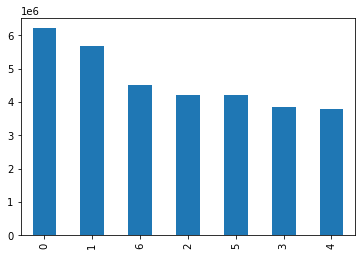

In [4]:
ords_prods_merge['orders_day_of_the_week'].value_counts().plot.bar()

<AxesSubplot:>

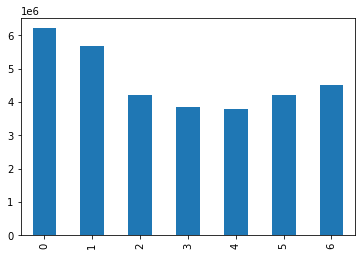

In [5]:
ords_prods_merge['orders_day_of_the_week'].value_counts().sort_index().plot.bar()

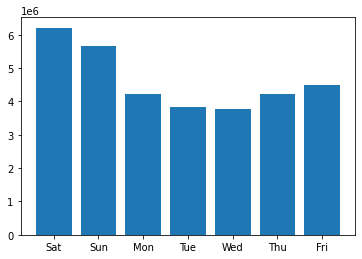

In [6]:
fig = plt.figure()
label = ['Sat', 'Sun', 'Mon', 'Tue', 'Wed','Thu','Fri']
value = ords_prods_merge['orders_day_of_the_week'].value_counts().sort_index()
busy_week = plt.bar(label, value)

In [7]:
fig.savefig(r'C:\Users\kenta\Instacart Basket Analysis\04 Analysis\Visualizations\busy_week.png')

<AxesSubplot:>

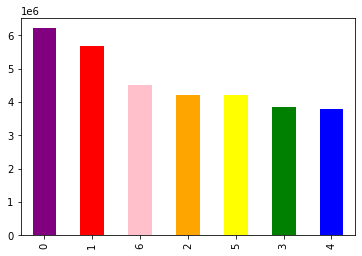

In [8]:
ords_prods_merge['orders_day_of_the_week'].value_counts().plot.bar(color = ['purple','red','pink','orange','yellow','green','blue'])

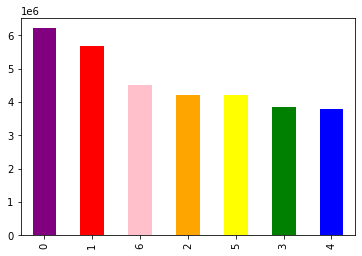

In [9]:
bar = ords_prods_merge['orders_day_of_the_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [10]:
bar.figure.savefig(r'C:\Users\kenta\Instacart Basket Analysis\04 Analysis\Visualizations\bar_orders_dow.png')

<AxesSubplot:ylabel='Frequency'>

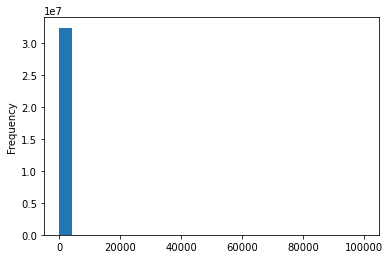

In [11]:
ords_prods_merge['prices'].plot.hist(bins = 25)

In [12]:
pd.options.display.float_format = '{:.2f}'.format

In [13]:
ords_prods_merge.describe()

,order_id,user_id,order_number,orders_day_of_the_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id,prices,max_order,Average_spending,Median_days_since_prior_order,Age,Number_of_dependents,income
count,32435059.00,32435059.00,32435059.00,32435059.00,32435059.00,32435059.00,32435059.00,32435059.00,32435059.00,32404859.00,32404859.00,32404859.00,32435059.00,32435059.00,32435059.00,32435059.00,32435059.00,32435059.00
mean,1710747.56,102937.20,17.14,2.74,13.42,11.10,25576.35,8.35,0.59,71.20,9.92,11.98,33.05,11.98,10.03,49.47,1.50,99435.50
std,987300.56,59466.51,17.53,2.09,4.25,8.49,14096.57,7.13,0.49,38.21,6.28,495.66,25.15,83.22,6.32,18.49,1.12,43055.40
min,2.00,1.00,1.00,0.00,0.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00,3.00,1.00,0.00,18.00,0.00,25903.00
25%,855943.00,51420.00,5.00,1.00,10.00,5.00,13532.00,3.00,0.00,31.00,4.00,4.20,13.00,7.39,6.00,33.00,1.00,67002.00
50%,1711047.00,102611.00,11.00,3.00,13.00,8.00,25256.00,6.00,1.00,83.00,9.00,7.40,26.00,7.82,8.00,49.00,2.00,96612.00
75%,2565514.00,154391.00,24.00,5.00,16.00,14.00,37935.00,11.00,1.00,107.00,16.00,11.30,47.00,8.25,12.00,65.00,3.00,127908.00
max,3421083.00,206209.00,99.00,6.00,23.00,30.00,49688.00,145.00,1.00,134.00,21.00,99999.00,99.00,25005.42,30.00,81.00,3.00,593901.00


<AxesSubplot:xlabel='prices', ylabel='prices'>

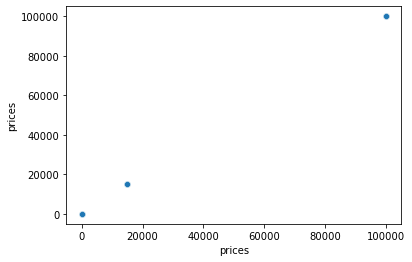

In [14]:
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

In [15]:
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,order_id,user_id,eval_set,order_number,orders_day_of_the_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,First Name,Surnam,Gender,STATE,Age,date_joined,Number_of_dependents,family_status,income,_merge
1576,912404,17,prior,12,2,14,5.00,21553,5,0,...,Barbara,Chang,Female,Kansas,39,9/16/2018,3,married,150659,both
1638,603376,17,prior,22,6,16,4.00,21553,3,1,...,Barbara,Chang,Female,Kansas,39,9/16/2018,3,married,150659,both
16534,3264360,135,prior,2,2,21,13.00,21553,6,0,...,NaN,Chen,Female,Maryland,30,3/19/2017,3,married,120635,both
16540,892534,135,prior,3,0,8,12.00,21553,3,1,...,NaN,Chen,Female,Maryland,30,3/19/2017,3,married,120635,both
53712,229704,342,prior,8,1,19,30.00,21553,9,0,...,Ruby,Bates,Female,Minnesota,56,8/23/2018,2,married,187328,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32350634,3172853,205650,prior,18,1,9,7.00,21553,17,1,...,Jeremy,Vang,Male,Kentucky,62,10/2/2017,0,divorced/widowed,302526,both
32377867,2504315,205818,prior,3,5,15,3.00,21553,13,0,...,James,Hunter,Male,Maryland,60,7/12/2019,1,married,172539,both
32377877,1108388,205818,prior,5,4,5,1.00,21553,5,1,...,James,Hunter,Male,Maryland,60,7/12/2019,1,married,172539,both
32410707,1916142,206049,prior,1,2,17,11.11,21553,2,0,...,Louise,Leal,Female,District of Columbia,23,4/26/2019,1,married,169022,both


In [16]:
ords_prods_merge.loc[ords_prods_merge['prices'] > 14991]

,order_id,user_id,eval_set,order_number,orders_day_of_the_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,First Name,Surnam,Gender,STATE,Age,date_joined,Number_of_dependents,family_status,income,_merge
129037,183964,873,prior,3,0,10,7.00,33664,11,0,...,Edward,Carr,Male,Colorado,64,2/28/2019,3,married,290220,both
129050,1851256,873,prior,4,6,12,13.00,33664,8,1,...,Edward,Carr,Male,Colorado,64,2/28/2019,3,married,290220,both
284544,1915696,1893,prior,1,5,17,11.11,33664,10,0,...,Christine,Le,Female,Colorado,23,8/27/2019,3,married,348829,both
284555,2763293,1893,prior,2,4,16,13.00,33664,6,1,...,Christine,Le,Female,Colorado,23,8/27/2019,3,married,348829,both
284578,2564805,1893,prior,4,1,17,30.00,33664,3,1,...,Christine,Le,Female,Colorado,23,8/27/2019,3,married,348829,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32109860,2249946,204099,prior,29,0,8,4.00,33664,1,0,...,Gary,Wilson,Male,Washington,48,9/8/2019,3,married,536156,both
32109877,2363282,204099,prior,31,0,9,2.00,33664,1,1,...,Gary,Wilson,Male,Washington,48,9/8/2019,3,married,536156,both
32155722,3181945,204395,prior,13,3,15,8.00,33664,25,0,...,Shirley,Ellis,Female,Missouri,78,11/9/2019,3,married,137004,both
32285161,2486215,205227,prior,7,3,20,4.00,33664,8,0,...,Victor,Rivers,Male,Arizona,78,8/9/2018,3,married,294898,both


In [17]:
ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [18]:
ords_prods_merge['prices'].max()

25.0

<AxesSubplot:ylabel='Frequency'>

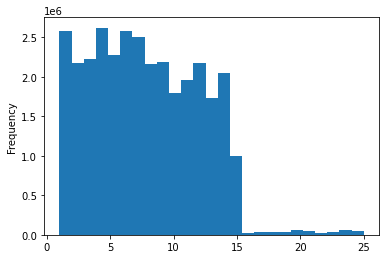

In [19]:
ords_prods_merge['prices'].plot.hist(bins = 25)

In [20]:
np.random.seed(4)

In [21]:
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [22]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [23]:
big = ords_prods_merge[dev]

In [24]:
small = ords_prods_merge[~dev]

In [25]:
len(big)

22705099

In [26]:
len(big)+len(small)

32435059

In [27]:
len(ords_prods_merge)

32435059

In [28]:
df_2 = small[['orders_day_of_the_week','prices']]

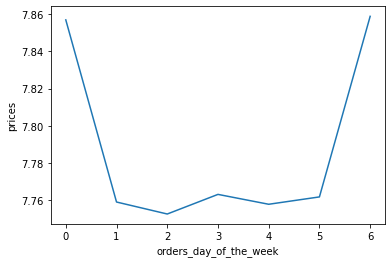

In [29]:
line = sns.lineplot(data = df_2, x = 'orders_day_of_the_week',y = 'prices')

In [30]:
df_4 = ords_prods_merge[['orders_day_of_the_week','prices']]

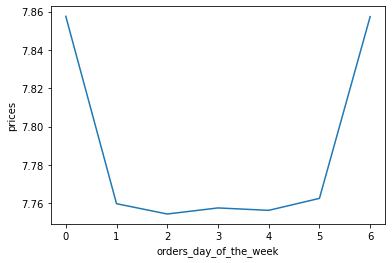

In [31]:
line_2 = sns.lineplot(data = df_4, x = 'orders_day_of_the_week',y = 'prices')

In [61]:
line_2.figure.savefig(r'C:\Users\kenta\Instacart Basket Analysis\04 Analysis\Visualizations\price_week.png',bbox_inches="tight")

<AxesSubplot:ylabel='Frequency'>

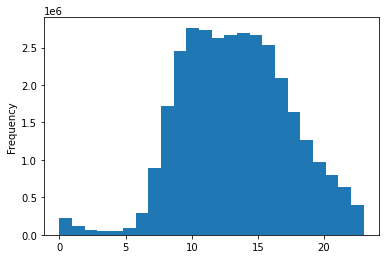

In [32]:
# 3. You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.
ords_prods_merge['order_hour_of_day'].plot.hist(bins = 24)

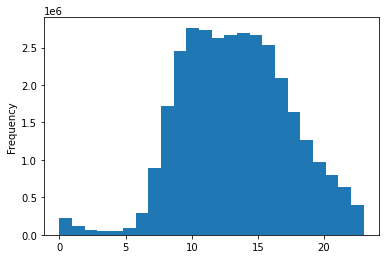

In [33]:
busy_time = ords_prods_merge['order_hour_of_day'].plot.hist(bins = 24)

In [34]:
busy_time.figure.savefig(r'C:\Users\kenta\Instacart Basket Analysis\04 Analysis\Visualizations\busy_time.png')

# In the above table, the x-axis is the time and the y-axis is the number of orders, and it shows the time zone when many orders are placed.

In [35]:
# 4. The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.
customer_merged['loyalty_flag'].value_counts()

Regular customer    16381472
Loyal customer      10679578
New customer         5580218
Name: loyalty_flag, dtype: int64

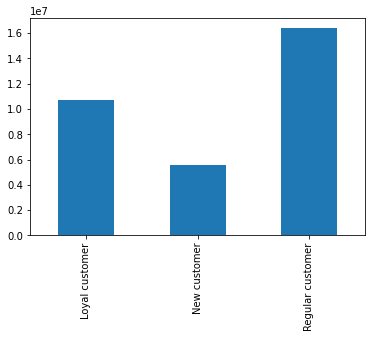

In [36]:
bar_loyalty_flag = customer_merged['loyalty_flag'].value_counts().sort_index().plot.bar()

Loyal customer   = Max order  > 40

Regular customer = Max order  40 => 10

New customer     = Max oerder 10 >=  

In [37]:
bar_loyalty_flag.figure.savefig(r'C:\Users\kenta\Instacart Basket Analysis\04 Analysis\Visualizations\bar_loyalty_flag.png')

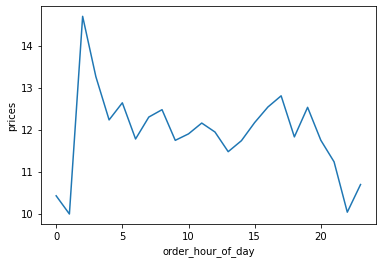

In [38]:
# 5.Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. 
line_price = sns.lineplot(data = customer_merged, x = 'order_hour_of_day',y = 'prices')

In [39]:
line_price.figure.savefig(r'C:\Users\kenta\Instacart Basket Analysis\04 Analysis\Visualizations\line_price.png')

In [40]:
line_price.figure.savefig(r'C:\Users\kenta\Instacart Basket Analysis\04 Analysis\Visualizations\line_price_order_hour.png')

In [41]:
# 6. Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family status by creating a line chart exploring the connections between age and number of dependents:
customer = pd.read_csv(r'C:\Users\kenta\Instacart Basket Analysis\02 Data\Original Data\customers.csv',index_col = False)

In [42]:
customer.rename(columns = {'n_dependants' : 'Number_of_dependents'}, inplace = True)

In [43]:
customer.rename(columns = {'fam_status' : 'family_status'}, inplace = True)

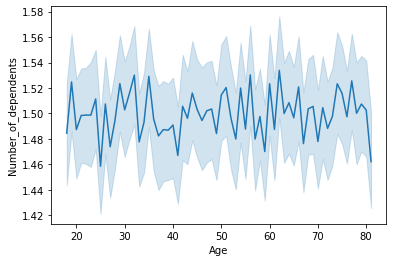

In [44]:
# average dependents for customer by age.
line_Age_dependents = sns.lineplot(data = customer, x = 'Age',y = 'Number_of_dependents')

In the graph above, the x-axis shows the age and the y-axis shows the average number of dependents, showing the relationship between the number of dependents and age. There is no correlation between them.

In [45]:
line_Age_dependents.figure.savefig(r'C:\Users\kenta\Instacart Basket Analysis\04 Analysis\Visualizations\line_Age_dependents.png')

In [46]:
customer['family_status'].value_counts()

married                             144906
single                               33962
divorced/widowed                     17640
living with parents and siblings      9701
Name: family_status, dtype: int64

In [47]:
customer_mean = customer.groupby('family_status').mean()

In [48]:
customer_married = customer.loc[customer['family_status'] == 'married']

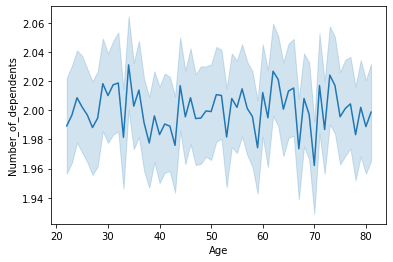

In [49]:
# average dependents for married customer by age.
line_customer_married = sns.lineplot(data = customer_married, x = 'Age',y = 'Number_of_dependents')

In the graph above, the x-axis shows the age and the y-axis shows the average number of dependents, showing the relationship between the number of dependents and age among married customer. There is no correlation between them.

In [50]:
line_customer_married.figure.savefig(r'C:\Users\kenta\Instacart Basket Analysis\04 Analysis\Visualizations\line_customer_married.png')

In [51]:
pd.options.display.float_format = '{:.4f}'.format

In [52]:
customer_single = customer.loc[customer['family_status'] == 'single']

In [53]:
customer.describe()

,user_id,Age,Number_of_dependents,income
count,206209.0000,206209.0000,206209.0000,206209.0000
mean,103105.0000,49.5016,1.4998,94632.8525
std,59527.5552,18.4810,1.1184,42473.7870
min,1.0000,18.0000,0.0000,25903.0000
25%,51553.0000,33.0000,0.0000,59874.0000
50%,103105.0000,49.0000,1.0000,93547.0000
75%,154657.0000,66.0000,3.0000,124244.0000
max,206209.0000,81.0000,3.0000,593901.0000


In [54]:
customer_mean

,user_id,Age,Number_of_dependents,income
family_status,,,,
divorced/widowed,103716.8809,70.5491,0.0000,109708.2882
living with parents and siblings,102464.6402,19.4969,1.9995,67572.9067
married,103003.8652,51.5261,2.0005,96471.8790
single,103401.6137,38.5023,0.0000,86685.4962


Average age for entire customer is 49.5 years old.

Average age for married customer is 51.5 years old.

In [55]:
# 7.You’ll also need to explore whether there’s a connection between age and spending power. To visualize this relationship, create a scatterplot using the sns.scatterplot() function.
customer_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32641268 entries, 0 to 32641267
Data columns (total 33 columns):
 #   Column                         Dtype   
---  ------                         -----   
 0   order_id                       int64   
 1   user_id                        int64   
 2   eval_set                       object  
 3   order_number                   int64   
 4   orders_day_of_the_week         int64   
 5   order_hour_of_day              int64   
 6   days_since_prior_order         float64 
 7   product_id                     float64 
 8   add_to_cart_order              float64 
 9   reordered                      float64 
 10  product_name                   object  
 11  aisle_id                       float64 
 12  department_id                  float64 
 13  prices                         float64 
 14  busiest_day                    object  
 15  busiest_days                   object  
 16  busy_time                      object  
 17  max_order                

In [56]:
customer_merged['spending_flag'].value_counts()

Low spender     32001268
High spender      640000
Name: spending_flag, dtype: int64

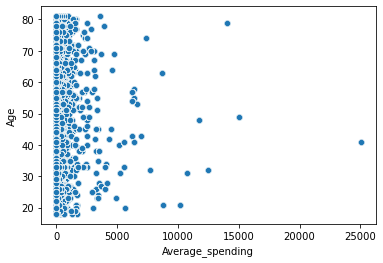

In [57]:
scatterplot_Age_Average_spending = sns.scatterplot(x = 'Average_spending', y = 'Age',data = customer_merged)

In the graph above, the x-axis shows the average_spending and the y-axis shows the age, showing the relationship between the average spending and age from customer. There is no correlation between them.

In [58]:
scatterplot_Age_Average_spending.figure.savefig(r'C:\Users\kenta\Instacart Basket Analysis\04 Analysis\Visualizations\scatterplot_Age_Average_spending.png')

In [59]:
ords_prods_merge.head()

,order_id,user_id,eval_set,order_number,orders_day_of_the_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,First Name,Surnam,Gender,STATE,Age,date_joined,Number_of_dependents,family_status,income,_merge
0,2539329,1,prior,1,2,8,11.1100,196,1,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2539329,1,prior,1,2,8,11.1100,14084,2,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,2539329,1,prior,1,2,8,11.1100,12427,3,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2539329,1,prior,1,2,8,11.1100,26088,4,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,2539329,1,prior,1,2,8,11.1100,26405,5,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


In [60]:
pd.set_option('display.max_columns', 50)